# Análise exploratória
Nesse notebook realizamos o EDA dos dados vindos do e-SUS-VE. Nessa primeira fase, tratamos os dados da região de São Paulo. Os dados relacionam a vigilância da Síndrome Gripal (SG) de casos leves a moderados suspeitos de COVID-19.

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
pd.set_option('display.max_columns', None)

Carregando dados do CSV

In [3]:
PATH_DADOS = '../dados/e_sus/'

files = ['dados-sp-1.csv', 'dados-sp-2.csv', 'dados-sp-3.csv', 'dados-sp-4.csv']
files = [PATH_DADOS + f for f in files]

In [4]:
dflist = []

cols = ['ÿid', 'dataNotificacao', 'dataInicioSintomas', 'dataNascimento',
       'sintomas', 'profissionalSaude', 'cbo', 'condicoes', 'estadoTeste',
       'dataTeste', 'tipoTeste', 'resultadoTeste', 'paisOrigem', 'sexo',
       'estado', 'estadoIBGE', 'municipio', 'municipioIBGE', 'origem', 'cnes',
       'estadoNotificacao', 'estadoNotificacaoIBGE', 'municipioNotificacao',
       'municipioNotificacaoIBGE', 'excluido', 'validado', 'idade',
       'dataEncerramento', 'evolucaoCaso', 'classificacaoFinal']


for file in files:
    dfLoad = pd.read_csv(file, sep = ';', encoding = 'latin-1')
    dfLoad = dfLoad[[c for c in dfLoad.columns if c in cols]]
    dflist.append(dfLoad.copy())

df = pd.concat(dflist)

/home/german.salazar/.local/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3145: DtypeWarning: Columns (15,21,23,26) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
/home/german.salazar/.local/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3145: DtypeWarning: Columns (15,17,21,23,26) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
/home/german.salazar/.local/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3145: DtypeWarning: Columns (15,21,23) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
/home/german.salazar/.local/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3145: DtypeWarning: Columns (15,17,21,23) have mixed types.Specify dtype option on import or set low_

In [5]:
cols = df.columns
print(cols)

Index(['ÿid', 'dataNotificacao', 'dataInicioSintomas', 'dataNascimento',
       'sintomas', 'profissionalSaude', 'cbo', 'condicoes', 'estadoTeste',
       'dataTeste', 'tipoTeste', 'resultadoTeste', 'paisOrigem', 'sexo',
       'estado', 'estadoIBGE', 'municipio', 'municipioIBGE', 'origem', 'cnes',
       'estadoNotificacao', 'estadoNotificacaoIBGE', 'municipioNotificacao',
       'municipioNotificacaoIBGE', 'excluido', 'validado', 'idade',
       'dataEncerramento', 'evolucaoCaso', 'classificacaoFinal'],
      dtype='object')


In [6]:
df.head(5)

,ÿid,dataNotificacao,dataInicioSintomas,dataNascimento,sintomas,profissionalSaude,cbo,condicoes,estadoTeste,dataTeste,tipoTeste,resultadoTeste,paisOrigem,sexo,estado,estadoIBGE,municipio,municipioIBGE,origem,cnes,estadoNotificacao,estadoNotificacaoIBGE,municipioNotificacao,municipioNotificacaoIBGE,excluido,validado,idade,dataEncerramento,evolucaoCaso,classificacaoFinal
0,uASeuqrGky,2020-07-01T19:07:21.317Z,2020-06-19T03:00:00.000Z,1991-05-12T03:00:00.000Z,"Dor de Garganta, Febre, Tosse",Não,NaN,NaN,Concluído,2020-06-25T03:00:00.000Z,RT-PCR,Negativo,undefined,Feminino,SÃO PAULO,35,São José dos Campos,3549904,undefined,3042529,SÃO PAULO,35,São José dos Campos,3549904,undefined,undefined,29,2020-07-03T03:00:00.000Z,Ignorado,Descartado
1,GwfS7lA5Pz,2020-05-15T17:26:24.017Z,2020-05-01T03:00:00.000Z,1980-05-03T03:00:00.000Z,Outros,Não,NaN,NaN,Concluído,2020-05-13T03:00:00.000Z,RT-PCR,Positivo,undefined,Masculino,SÃO PAULO,35,São Paulo,3550308,undefined,undefined,SÃO PAULO,35,São Paulo,3550308,undefined,undefined,40,2020-07-10T03:00:00.000Z,Cura,Confirmado Laboratorial
2,UHCw5QTQE6,2020-07-07T13:40:32.574Z,2020-07-03T03:00:00.000Z,1972-11-04T03:00:00.000Z,"Febre, Tosse, Outros",Não,NaN,NaN,Concluído,2020-07-07T03:00:00.000Z,RT-PCR,Negativo,undefined,Feminino,SÃO PAULO,35,Jales,3524808,undefined,6371531,SÃO PAULO,35,Jales,3524808,undefined,undefined,47,2020-07-10T03:00:00.000Z,Cura,Descartado
3,102460,2020-03-12T03:00:00.000Z,2020-03-09T03:00:00.000Z,1970-08-11T03:00:00.000Z,"Dispnéia,Febre,Tosse",Não,NaN,NaN,Concluído,2020-04-28T03:00:00.000Z,RT-PCR,Positivo,undefined,Masculino,SÃO PAULO,undefined,São Sebastião,undefined,undefined,undefined,NaN,undefined,Sao Sebastiao,undefined,undefined,undefined,50,2020-07-10T03:00:00.000Z,Cura,Confirmado Laboratorial
4,Ch4hgLnxMq,2020-07-10T18:43:13.587Z,2020-06-15T03:00:00.000Z,1984-05-15T03:00:00.000Z,"Febre, Outros",Não,NaN,NaN,Concluído,2020-07-08T03:00:00.000Z,TESTE RÁPIDO - ANTICORPO,Positivo,undefined,Masculino,SÃO PAULO,35,São Paulo,3550308,undefined,3778452,SÃO PAULO,35,São Paulo,3550308,undefined,undefined,36,NaN,NaN,NaN


# Filtragem

Uma primeira filtragem é feita no reconhecimento de casos positivos de Covid-19.

Filtrar por estadoTeste == 'concluido' e resultadoTeste == 'positivo'

Observamos que na primeira fase, vamos nos importar pelas seguintes variáveis demográficas

- Idade
- Sexo
- Municipio (municipioNotificação)
- Estado
- Condições (estado de saúde da pessoa)

In [7]:
dfPositivo = df[(df.estadoTeste == 'Concluído') & (df.resultadoTeste == 'Positivo')]
dfPositivo.shape

(970759, 30)

## 1. Análise em coluna de idade

O primeiro teste é feito com a coluna idade. Realizamos a conversão de String para Int dos dados e fazemos remoção dos dados NaN na coluna

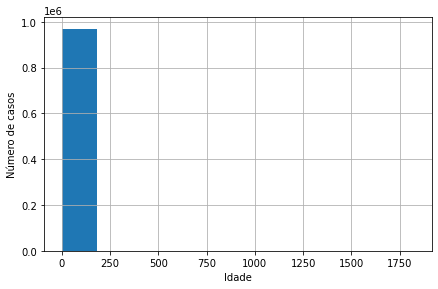

In [8]:
dfIdade = dfPositivo.copy()
dfIdade['idade'] = dfIdade['idade'].apply(pd.to_numeric, errors= 'coerce')
dfIdade = dfIdade[dfIdade['idade'].notna()]
dfIdade.hist(column='idade')
plt.tight_layout()
plt.ylabel("Número de casos")
plt.xlabel("Idade")
plt.title("")
plt.savefig('Histograma idade sem limpeza.svg', format='svg')

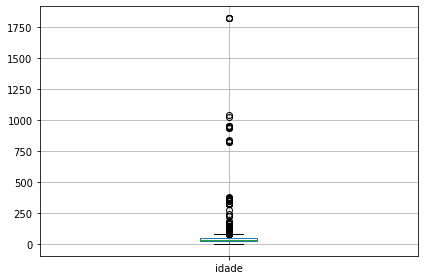

In [9]:
dfIdade[['idade']].boxplot()
plt.tight_layout()
plt.savefig('Boxplot idade.svg', format='svg')

Observamos que existem muitos dados errados dentro da coluna que podem ser causados por preenchimento errado da informação. Realizamos a limpeza do Dataframe removendo os outliers, implementando a função z-score de Scipy

In [10]:
from scipy import stats

# dfIdade['z'] = np.abs(stats.zscore(dfIdade[['idade']]))

In [11]:
dfIdade.shape

(970759, 30)

In [12]:
dfIdade = dfIdade[(np.abs(stats.zscore(dfIdade[['idade']])) < 3).all(axis=1)]

In [13]:
dfIdade.shape

(968510, 30)

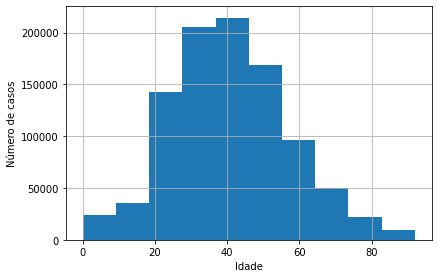

In [14]:
dfIdade.hist(column='idade')
plt.tight_layout()
plt.ylabel("Número de casos")
plt.xlabel("Idade")
plt.title("")
plt.savefig('Histograma idade.svg', format='svg')

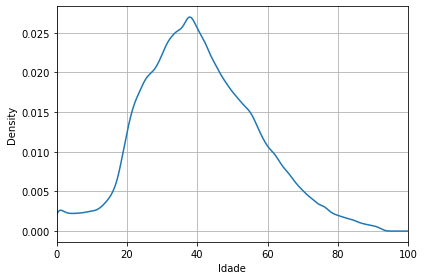

In [15]:
dfIdade['idade'].plot.kde()
plt.xlabel("Idade")
plt.grid(True)
plt.xlim(0, 100)
plt.tight_layout()
plt.savefig('KDE idade.svg', format='svg')

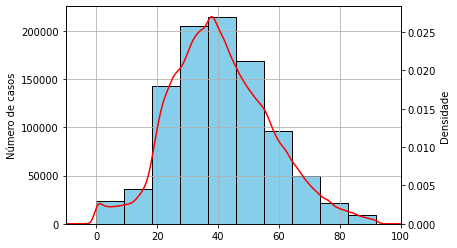

In [16]:
fig, ax = plt.subplots()
dfIdade['idade'].plot(kind = 'hist', ax=ax, edgecolor='black', color='skyblue')
ax2 = dfIdade['idade'].plot(kind='kde', secondary_y=True, ax=ax, color='red')
ax2.set_ylabel("Densidade")
ax2.set_ylim(0)
ax2.set_xlim(-10, 100)
ax.grid(True)
ax2.set_xlabel("Idade")
ax.set_ylabel("Número de casos")
ax.xaxis.grid(True, which='major')
plt.savefig('Histograma idade 2.svg', format='svg')

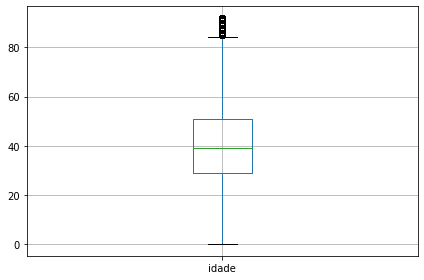

In [17]:
dfIdade[['idade']].boxplot()
plt.tight_layout()
plt.savefig('Boxplot idade 2.svg', format='svg')

Vamos observar a relação de casos no tempo

In [18]:
dfIdade['extractDate'] = dfIdade['dataNotificacao'].astype(str)
dfIdade['extractDate'] = dfIdade['extractDate'].str.extract(r'(^\d{4}-\d{2}-\d{2})')
dfIdade['extractDate'] = pd.to_datetime(dfIdade['extractDate'], format='%Y-%m-%d', errors='coerce')

cols = ['extractDate', 'idade']

dfIdadeA = dfIdade[cols].copy()
dfIdadeA['idade'] = dfIdadeA['idade'].astype(float)

dfIdadeA['idadeTrunc'] = dfIdadeA['idade'].div(10).astype(int)
dfIdadeA['idadeTrunc'] = dfIdadeA['idadeTrunc'].mul(10).astype(int)

dfIdadeA = dfIdadeA.sort_values('extractDate')
dfIdadeA['month'] = dfIdadeA['extractDate'].dt.normalize() - pd.offsets.MonthBegin(1)
dfIdadeA.count()

extractDate    968365
idade          968510
idadeTrunc     968510
month          968365
dtype: int64

In [19]:
dfIdadePlot = dfIdadeA.groupby(['month', 'idadeTrunc']).size().reset_index(name='counts')

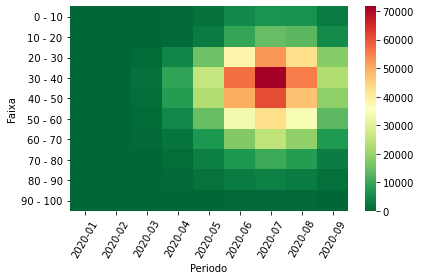

In [20]:
dfIdadePlotBar = dfIdadePlot.set_index('idadeTrunc')
dfIdadePlotBar = dfIdadePlotBar.pivot(columns = 'month').fillna(0.0)
dfIdadePlotBar.columns = [str(c[1])[0:7] for c in dfIdadePlotBar.columns]
dfIdadePlotBar.index = pd.Index([str(c) + " - " + str(c+10) for c in dfIdadePlotBar.index], name = 'Faixa')

sns.heatmap(dfIdadePlotBar, cmap='RdYlGn_r')
plt.xlabel('Periodo')
plt.xticks(rotation=60)
plt.tight_layout()
plt.savefig('Heatmap Faixa etaria.svg', format='svg')

# dfIdadePlotBar.plot.bar()

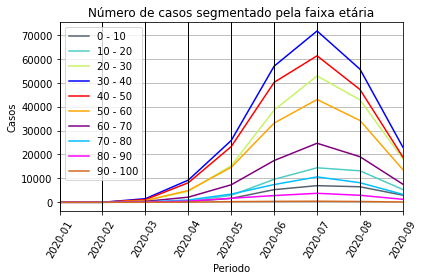

In [21]:
dfIdadePlotParaCoor = dfIdadePlot

dfIdadePlotParaCoor = dfIdadePlot.set_index('idadeTrunc')
dfIdadePlotParaCoor = dfIdadePlotParaCoor.pivot(columns = 'month').fillna(0.0)
dfIdadePlotParaCoor.columns = [str(c[1])[0:7] for c in dfIdadePlotParaCoor.columns]

dfIdadePlotParaCoor.index = pd.Index([str(c) + " - " + str(c+10) for c in dfIdadePlotParaCoor.index], name = 'faixa')
color = ['#556270', '#4ECDC4', '#C7F464', 'blue', 'red', 'orange', 'purple', 'deepskyblue', 'magenta', 'chocolate']

pd.plotting.parallel_coordinates(dfIdadePlotParaCoor.reset_index(), 'faixa', color = color)
plt.grid(True)
plt.legend(loc = 2)
plt.xticks(rotation=60)
plt.xlabel('Periodo')
plt.ylabel('Casos')
plt.title('Número de casos segmentado pela faixa etária')
plt.tight_layout()
plt.savefig('Parallel Coordinates.svg', format='svg')

## 2. Evoluação de casos novos no tempo

In [22]:
colsEvol = ['dataNotificacao']

dfData = dfPositivo[colsEvol]
dfData = dfData.dropna()
dfData = dfData[dfData['dataNotificacao'].str.match(r'(^\d{4}-\d{2}-\d{2})')==True]
dfData['extractDate'] = dfData['dataNotificacao'].str.extract(r'(^\d{4}-\d{2}-\d{2})')

dfData
dfData['dataNotificacao'] = pd.to_datetime(dfData['extractDate'], format='%Y-%m-%d', errors='coerce')

In [23]:
dfData

,dataNotificacao,extractDate
1,2020-05-15,2020-05-15
3,2020-03-12,2020-03-12
4,2020-07-10,2020-07-10
10,2020-05-12,2020-05-12
14,2020-06-24,2020-06-24
...,...,...
999985,2020-09-24,2020-09-24
999987,2020-09-11,2020-09-11
999990,2020-09-08,2020-09-08
999991,2020-09-24,2020-09-24


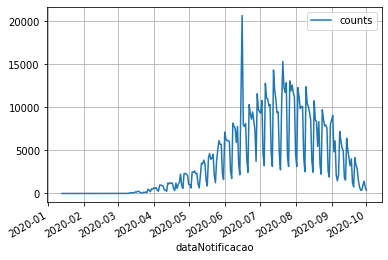

In [24]:
dfData = dfData.sort_values(by=['dataNotificacao'])

dfAux = dfData[['dataNotificacao']].groupby(['dataNotificacao']).size().reset_index(name='counts')
dfAux = dfAux.set_index(['dataNotificacao'])

dfAux.plot()
plt.grid()

In [25]:
dfAux['acumulado'] = dfAux['counts'].cumsum()

Observe-se que existe um aumento dos casos e depois uma queda no número de casos até final de julho. No final de agosto e começo de Setembro, o número como está aumentando de novo. Por que a mudança rapida entre número de casos?

Podemos realizar a média movel da gráfica para previsão de novos casos?

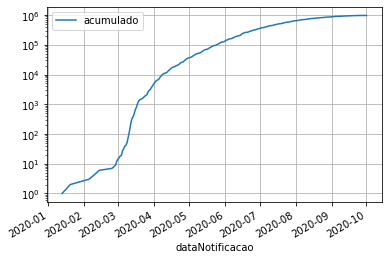

In [26]:
dfAux[['acumulado']].plot(logy = True)
plt.grid()

## 3. Correlação de variáveis

A correlação é somente feita sobre dados numéricos

In [27]:
colsCorr = ['dataNotificacao', 'sexo', 'municipioNotificacao', 'idade', 'condicoes']

dfCorr = dfPositivo[colsCorr]
df_corr = dfCorr.corr(method ='kendall') 
# df_corr = df_corr.style.background_gradient(cmap='RdBu')
df_corr

""


In [28]:
dfCorr.corr(method ='kendall') 

""


## 4. Evolução de casos nas 5 principais cidades

Os municipios possuim o código IBGE para rotular cada cidade

Arrumar código IBGE para todos os municipios que possuim. tem muito dado Null

In [29]:
dfCidade = dfPositivo.copy()

# Quando estadoNotificacao não for 'SÃO PAULO', preencher com dados de estado
dfCidade['estadoCoalesce'] = np.where(dfCidade['estadoNotificacao'] == 'SÃO PAULO', dfCidade['estadoNotificacao'], dfCidade['estado'])
dfCidade['municipioCoalesce'] = np.where(dfCidade['estadoNotificacao'] == 'SÃO PAULO', dfCidade['municipioNotificacao'], dfCidade['municipio'])

# Normalizando acentos
dfCidade['estadoCoalesce'] = dfCidade['estadoCoalesce'].str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8').str.lower()
dfCidade['municipioCoalesce'] = dfCidade['municipioCoalesce'].str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8').str.lower()



In [30]:
dfCasosCidade = dfCidade.groupby(['municipioCoalesce']).size().reset_index(name='casos').sort_values(by='casos')
dfCasosCidade = dfCasosCidade.rename(columns={'municipioCoalesce': 'municipioNormalizado'})
dfCasosCidade

,municipioNormalizado,casos
598,sarapui,1
50,av,1
30,apt 41,1
359,mogeiro,1
585,sao miguel,1
...,...,...
567,sao bernardo do campo,23761
564,santos,25117
579,sao jose do rio preto,25147
113,campinas,36758


Carregando nomes dos estados e cidades para normalização dos códigos

In [31]:
PATH_MUNICIPIOS = '../dados/municipios/municipios.csv'
dfMunicipios = pd.read_csv(PATH_MUNICIPIOS, sep = ',', encoding = 'utf-8')
dfMunicipios = dfMunicipios[dfMunicipios['codigo_uf'] == 35]
dfMunicipios['municipioNormalizado'] = dfMunicipios['nome'].str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8').str.lower()

In [32]:
dfCasosAPlot = pd.merge(dfCasosCidade, dfMunicipios, on = ['municipioNormalizado'])

In [33]:
dfCasosAPlot['sizeCircle'] = dfCasosAPlot['casos'].apply(np.log10)
dfCasosAPlot

lons = dfCasosAPlot['longitude']
lats = dfCasosAPlot['latitude']
sizeC = dfCasosAPlot['sizeCircle']

Para o mapamento dos pontos dentro do mapa, usamos o tutorial que aparece [aqui](https://makersportal.com/blog/2020/4/24/geographic-visualizations-in-python-with-cartopy). O programa foi modificado para pegar o mapa do estado de São de Paulo 

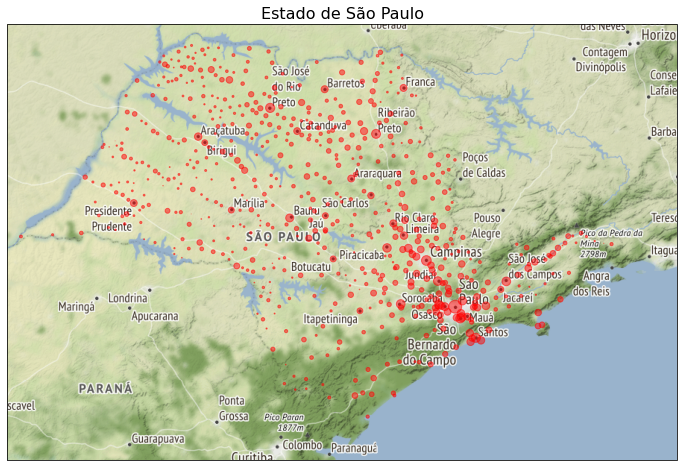

In [36]:
import numpy as np
import io
import cartopy.crs as ccrs
import cartopy.io.img_tiles as cimgt
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
from urllib.request import urlopen, Request
from PIL import Image

def image_spoof(self, tile): # this function pretends not to be a Python script
    url = self._image_url(tile) # get the url of the street map API
    req = Request(url) # start request
    req.add_header('User-agent','Anaconda 3') # add user agent to request
    fh = urlopen(req) 
    im_data = io.BytesIO(fh.read()) # get image
    fh.close() # close url
    img = Image.open(im_data) # open image with PIL
    img = img.convert(self.desired_tile_form) # set image format
    return img, self.tileextent(tile), 'lower' # reformat for cartopy

#######################################
# Formatting the Cartopy plot
#######################################

cimgt.Stamen.get_image = image_spoof # reformat web request for street map spoofing
osm_img = cimgt.Stamen('terrain') # spoofed, downloaded street map

fig = plt.figure(figsize=(12,9)) # open matplotlib figure
ax1 = plt.axes(projection=osm_img.crs) # project using coordinate reference system (CRS) of street map
ax1.set_title('Estado de São Paulo',fontsize=16)
extent = [-53.264, -43.363, -25.592, -19.653] # São Paulo Estado
# extent = [-74.257159,-73.699215,40.495992,40.915568] # NYC bounds
ax1.set_extent(extent) # set extents
# ax1.set_xticks(np.linspace(extent[0],extent[1],7),crs=ccrs.PlateCarree()) # set longitude indicators
# ax1.set_yticks(np.linspace(extent[2],extent[3],7)[1:],crs=ccrs.PlateCarree()) # set latitude indicators
# lon_formatter = LongitudeFormatter(number_format='0.1f',degree_symbol='',dateline_direction_label=True) # format lons
# lat_formatter = LatitudeFormatter(number_format='0.1f',degree_symbol='') # format lats

# ax1.xaxis.set_major_formatter(lon_formatter) # set lons
# ax1.yaxis.set_major_formatter(lat_formatter) # set lats
# ax1.xaxis.set_tick_params(labelsize=14)
# ax1.yaxis.set_tick_params(labelsize=14)

scale = np.ceil(-np.sqrt(2)*np.log(np.divide((extent[1]-extent[0])/2.0,350.0))) # empirical solve for scale based on zoom
scale = (scale<20) and scale or 19 # scale cannot be larger than 19
ax1.add_image(osm_img, int(scale)) # add OSM with zoom specification

ax1.scatter(lons, lats, s=sizeC**3, alpha= 0.5, transform=ccrs.PlateCarree(), color=['red'])
# plt.tight_layout()
plt.savefig('Coronavirus no Mapa.svg', format='svg', bbox_inches = 'tight' )